## PROBLEM STATEMENT : 
- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    0. Airplanes
    1. Cars
    2. Birds
    3. Cats
    4. Deers
    5. Dogs
    6. Frogs
    7. Horses
    8. Ships
    9. Trucks
- Dataset consists of 60,000 32x32 color images, ie 6000 images per class. 
- We need to design a model to predict the label of these images correctly. 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

## Reading Data

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Visualizing Data

In [ ]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

In [ ]:
def get_ten_random_images():
    """
    function returns a dictionary of <label, idx> where idx is the random datapoint of class 'label'
    """
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
    return d

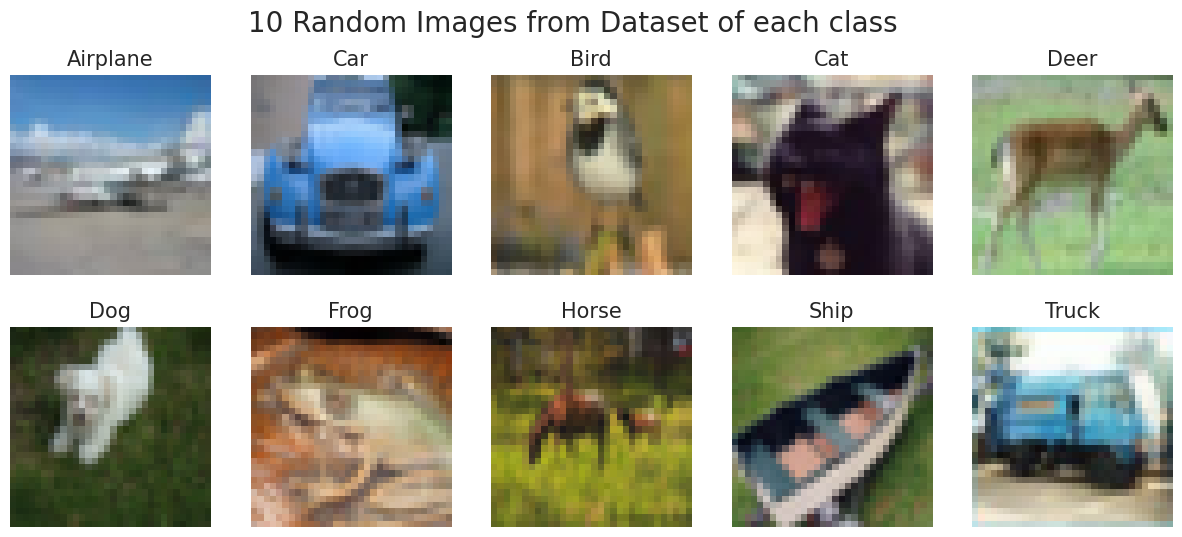

In [ ]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

## Data Modeling

In [ ]:
import keras

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
## Mean shifting and variance centering 

In [ ]:
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [ ]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [ ]:
## Converting target variable into categorical matrix

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
input_shape

(32, 32, 3)

## Model Training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [ ]:
weight_decay = 1e-4

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))
    


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
625/625 [==============================] - 10s 14ms/step - loss: 0.5675 - accuracy: 0.8439 - val_loss: 0.6762 - val_accuracy: 0.8140
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.5462 - accuracy: 0.8541 - val_loss: 0.6882 - val_accuracy: 0.8198
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.5310 - accuracy: 0.8604 - val_loss: 0.6638 - val_accuracy: 0.8282
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.5172 - accuracy: 0.8658 - val_loss: 0.6813 - val_accuracy: 0.8237
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.5064 - accuracy: 0.8749 - val_loss: 0.6488 - val_accuracy: 0.8366
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.4977 - accuracy: 0.8761 - val_loss: 0.7047 - val_accuracy: 0.8196
Epoch 7/10
625/625 [==============================] - 8s 14ms/step - loss: 0.4905 - accuracy: 0.8788 - val_loss: 0.6465 - val_accuracy: 0.841

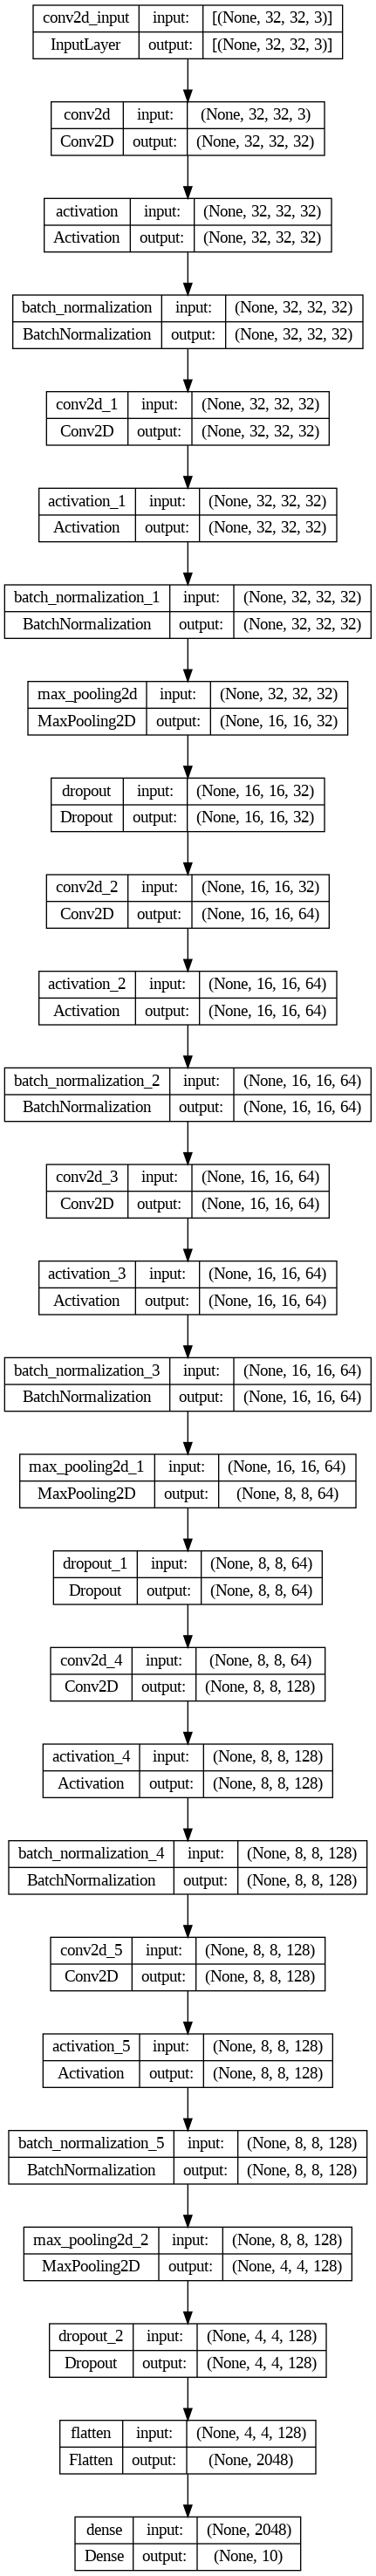

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Model Evaluation

In [ ]:
## evaluating using the test set

1/1 [==============================] - 0s 22ms/step


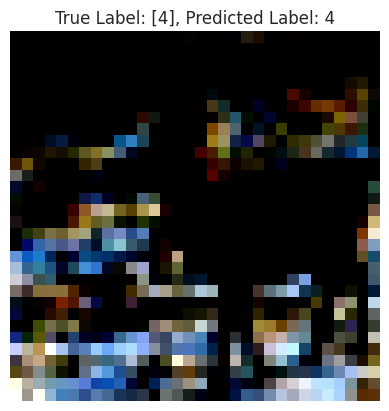

1/1 [==============================] - 0s 23ms/step


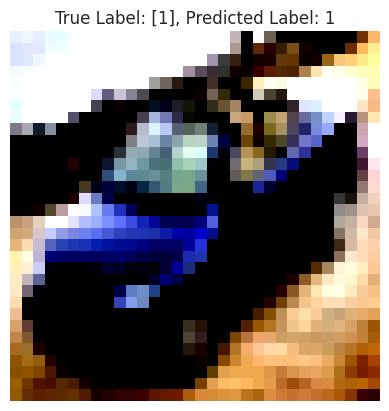

1/1 [==============================] - 0s 34ms/step


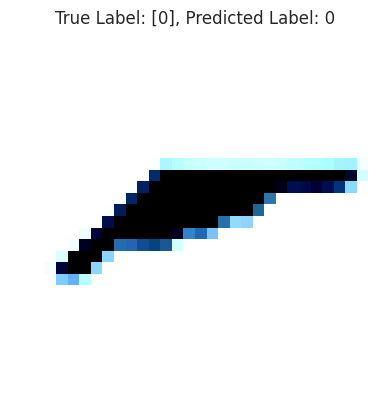

1/1 [==============================] - 0s 34ms/step


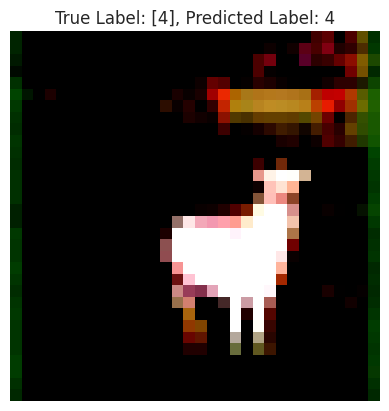

1/1 [==============================] - 0s 29ms/step


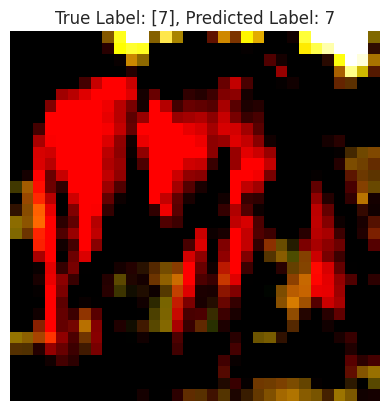

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select up to 5 random test samples
num_samples = min(5, len(X_test))  # Limit to 5 samples if the test dataset is smaller
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

for i in sample_indices:
    img = X_test[i]
    true_label = y_test[i]
    
    img = np.expand_dims(img, axis=0)
    
    pred = model.predict(img)
    
    pred_label = np.argmax(pred)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f'True Label: {true_label}, Predicted Label: {pred_label}')
    plt.show()

In [ ]:
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)

79/79 [==============================] - 1s 8ms/step - loss: 0.7317 - accuracy: 0.7978


In [ ]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 79.78%


### Notes:
- With simple normalization, the cv accuracy tends to be less than 10%. 
- With Standardization (z-score), the cv accuracy increases to over 90%.
- Next Step: Data augmentation to further increase the score. 